# Introduction to prunning


Prunning is a set of technics that allow for network size reduction.

The basic apprach is based on weights values and remove connections with small weights.

There is many different aproaches to prunning for example:

    1) statical weights analysis to check importance of input channel,

    2) statical weights analysis to check filters simmilarity,

    3) prunning by trainable parameters as channels importance levels.

This tutorial presents second approach.

In [1]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [1]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List, Tuple

# local_utils file contains util functions for training or display
# CHECK IT
import local_utils as lu

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

def set_random_seed(seed:int = 0):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    

cuda


Datasets

len(train_loader) = 938
len(test_loader) = 157
torch.Size([64, 1, 28, 28])
torch.Size([64])


<Figure size 432x288 with 0 Axes>

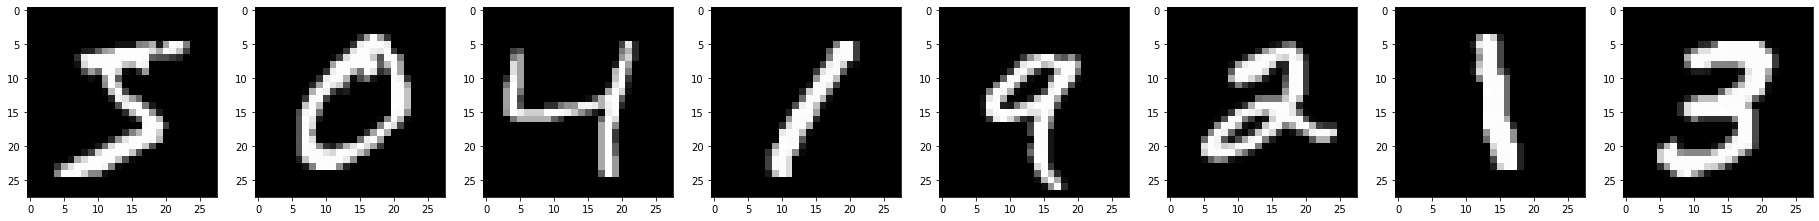

In [2]:
from torchvision.transforms import ToTensor

BATCH_SIZE = 64
set_random_seed(0)

train_dataset = datasets.MNIST('data', 
                              train=True,
                              download=True,
                              transform=ToTensor())
test_dataset = datasets.MNIST('data', 
                              train=False,
                              download=True,
                              transform=ToTensor())

train_loader = DataLoader(train_dataset, 
                          batch_size=BATCH_SIZE,
                          shuffle=False)
test_loader = DataLoader(test_dataset, 
                          batch_size=BATCH_SIZE,
                          shuffle=False)

print("len(train_loader) =", len(train_loader))
print("len(test_loader) =", len(test_loader))

plt.gray()
loader = train_loader
for X, y in loader:
    print(X.shape)
    print(y.shape)
    
    ROWS, COLS = 1, 8
    fig, axs = plt.subplots(ROWS, COLS)
    fig.set_size_inches(COLS*4,ROWS*4)
    axs = np.array(axs).flatten().tolist()
    
    for i, ax in enumerate(axs):
        img = X[i,...]
        class_label = loader.dataset.classes[y[i]]
        ax.imshow(img.permute(1,2,0))
    plt.show()
            
    break
        

Network definition and training

In [60]:
class NeuralNetwork(nn.Module):
    def __init__(self, 
                 input_shape=(1,28,28), 
                 num_of_classes=10,
                 hidden_1_size = 1024,
                 hidden_2_size = 1024,
                 ) -> None:
        super().__init__()
        input_len = torch.prod(torch.tensor(input_shape))
        self.flatten = nn.Flatten()
        self.hidden_1 = nn.Linear(input_len, hidden_1_size)
        self.hidden_2 = nn.Linear(hidden_1_size, hidden_2_size)
        self.last_layer = nn.Linear(hidden_2_size, num_of_classes)
        self.relu = nn.ReLU()
        self.sigm = nn.Sigmoid()
        
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.flatten(x)
        x = self.hidden_1(x)
        x = self.sigm(x)
        x = self.hidden_2(x)
        x = self.sigm(x)
        x = self.last_layer(x)
        x = self.sigm(x)
        
        return x


set_random_seed(0)
net = NeuralNetwork().to(device)
net_param_number = lu.count_params(net)
print(f"Network paramerters number: {net_param_number}")

set_random_seed(0)
metric = lu.AccuracyMetic()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

set_random_seed(0)
net, history = lu.training(net, train_loader, test_loader, criterion, metric, optimizer, 5, 30, device=device)

Network paramerters number: 1863690
Epoch 1 / 30: STARTED
TRAINING

938it [00:08, 112.42it/s]


VALIDATION

157it [00:01, 114.79it/s]


After epoch 1: loss=2.3015 acc=0.1121 val_loss=2.2980 val_acc=0.1028
Epoch 1 / 30: FINISHED

Epoch 2 / 30: STARTED
TRAINING

938it [00:08, 116.01it/s]


VALIDATION

157it [00:01, 117.36it/s]


After epoch 2: loss=2.2918 acc=0.1305 val_loss=2.2703 val_acc=0.1518
Epoch 2 / 30: FINISHED

Epoch 3 / 30: STARTED
TRAINING

938it [00:08, 110.40it/s]


VALIDATION

157it [00:01, 118.84it/s]


After epoch 3: loss=2.1816 acc=0.3144 val_loss=2.0202 val_acc=0.5424
Epoch 3 / 30: FINISHED

Epoch 4 / 30: STARTED
TRAINING

938it [00:07, 117.92it/s]


VALIDATION

157it [00:01, 120.33it/s]


After epoch 4: loss=1.9086 acc=0.5997 val_loss=1.8296 val_acc=0.6432
Epoch 4 / 30: FINISHED

Epoch 5 / 30: STARTED
TRAINING

938it [00:08, 117.21it/s]


VALIDATION

157it [00:01, 120.26it/s]


After epoch 5: loss=1.8016 acc=0.6374 val_loss=1.7772 val_acc=0.6522
Epoch 5 / 30: FINISHED

Epoch 6 / 30: STARTED
TRAINING

938it [00:08, 113.53it/s]


VALIDATION

157it [00:01, 120.51it/s]


After epoch 6: loss=1.7637 acc=0.6483 val_loss=1.7496 val_acc=0.6575
Epoch 6 / 30: FINISHED

Epoch 7 / 30: STARTED
TRAINING

938it [00:07, 117.67it/s]


VALIDATION

157it [00:01, 120.52it/s]


After epoch 7: loss=1.7388 acc=0.6525 val_loss=1.7271 val_acc=0.6595
Epoch 7 / 30: FINISHED

Epoch 8 / 30: STARTED
TRAINING

938it [00:07, 118.22it/s]


VALIDATION

157it [00:01, 120.34it/s]


After epoch 8: loss=1.7186 acc=0.6523 val_loss=1.7081 val_acc=0.6619
Epoch 8 / 30: FINISHED

Epoch 9 / 30: STARTED
TRAINING

938it [00:08, 115.95it/s]


VALIDATION

157it [00:01, 120.24it/s]


After epoch 9: loss=1.7016 acc=0.6601 val_loss=1.6919 val_acc=0.6752
Epoch 9 / 30: FINISHED

Epoch 10 / 30: STARTED
TRAINING

938it [00:07, 119.21it/s]


VALIDATION

157it [00:01, 120.57it/s]


After epoch 10: loss=1.6856 acc=0.6872 val_loss=1.6747 val_acc=0.7115
Epoch 10 / 30: FINISHED

Epoch 11 / 30: STARTED
TRAINING

938it [00:07, 119.41it/s]


VALIDATION

157it [00:01, 118.03it/s]


After epoch 11: loss=1.6684 acc=0.7329 val_loss=1.6573 val_acc=0.7526
Epoch 11 / 30: FINISHED

Epoch 12 / 30: STARTED
TRAINING

938it [00:07, 119.33it/s]


VALIDATION

157it [00:01, 121.48it/s]


After epoch 12: loss=1.6539 acc=0.7662 val_loss=1.6446 val_acc=0.7757
Epoch 12 / 30: FINISHED

Epoch 13 / 30: STARTED
TRAINING

938it [00:07, 118.01it/s]


VALIDATION

157it [00:01, 118.19it/s]


After epoch 13: loss=1.6438 acc=0.7870 val_loss=1.6353 val_acc=0.7904
Epoch 13 / 30: FINISHED

Epoch 14 / 30: STARTED
TRAINING

938it [00:08, 116.94it/s]


VALIDATION

157it [00:01, 120.29it/s]


After epoch 14: loss=1.6356 acc=0.8030 val_loss=1.6271 val_acc=0.7993
Epoch 14 / 30: FINISHED

Epoch 15 / 30: STARTED
TRAINING

938it [00:08, 117.09it/s]


VALIDATION

157it [00:01, 116.00it/s]


After epoch 15: loss=1.6279 acc=0.8130 val_loss=1.6189 val_acc=0.8045
Epoch 15 / 30: FINISHED

Epoch 16 / 30: STARTED
TRAINING

938it [00:08, 113.84it/s]


VALIDATION

157it [00:01, 120.44it/s]


After epoch 16: loss=1.6204 acc=0.8160 val_loss=1.6118 val_acc=0.8041
Epoch 16 / 30: FINISHED

Epoch 17 / 30: STARTED
TRAINING

938it [00:07, 118.83it/s]


VALIDATION

157it [00:01, 117.39it/s]


After epoch 17: loss=1.6142 acc=0.8129 val_loss=1.6064 val_acc=0.8040
Epoch 17 / 30: FINISHED

Epoch 18 / 30: STARTED
TRAINING

938it [00:08, 115.12it/s]


VALIDATION

157it [00:01, 108.63it/s]


After epoch 18: loss=1.6092 acc=0.8098 val_loss=1.6020 val_acc=0.8032
Epoch 18 / 30: FINISHED

Epoch 19 / 30: STARTED
TRAINING

938it [00:07, 118.05it/s]


VALIDATION

157it [00:01, 124.34it/s]


After epoch 19: loss=1.6051 acc=0.8078 val_loss=1.5983 val_acc=0.8032
Epoch 19 / 30: FINISHED

Epoch 20 / 30: STARTED
TRAINING

938it [00:07, 129.27it/s]


VALIDATION

157it [00:01, 145.17it/s]


After epoch 20: loss=1.6015 acc=0.8072 val_loss=1.5950 val_acc=0.8035
Epoch 20 / 30: FINISHED

Epoch 21 / 30: STARTED
TRAINING

938it [00:06, 137.02it/s]


VALIDATION

157it [00:01, 130.53it/s]


After epoch 21: loss=1.5984 acc=0.8071 val_loss=1.5921 val_acc=0.8052
Epoch 21 / 30: FINISHED

Epoch 22 / 30: STARTED
TRAINING

938it [00:07, 132.20it/s]


VALIDATION

157it [00:01, 145.14it/s]


After epoch 22: loss=1.5955 acc=0.8076 val_loss=1.5895 val_acc=0.8065
Epoch 22 / 30: FINISHED

Epoch 23 / 30: STARTED
TRAINING

938it [00:06, 134.37it/s]


VALIDATION

157it [00:01, 132.90it/s]


After epoch 23: loss=1.5929 acc=0.8087 val_loss=1.5871 val_acc=0.8086
Epoch 23 / 30: FINISHED

Epoch 24 / 30: STARTED
TRAINING

938it [00:06, 140.68it/s]


VALIDATION

157it [00:01, 142.83it/s]


After epoch 24: loss=1.5906 acc=0.8097 val_loss=1.5849 val_acc=0.8096
Epoch 24 / 30: FINISHED

Epoch 25 / 30: STARTED
TRAINING

938it [00:07, 133.11it/s]


VALIDATION

157it [00:01, 139.33it/s]


After epoch 25: loss=1.5883 acc=0.8108 val_loss=1.5828 val_acc=0.8118
Epoch 25 / 30: FINISHED

Epoch 26 / 30: STARTED
TRAINING

938it [00:06, 137.21it/s]


VALIDATION

157it [00:01, 145.62it/s]


After epoch 26: loss=1.5863 acc=0.8126 val_loss=1.5808 val_acc=0.8142
Epoch 26 / 30: FINISHED

Epoch 27 / 30: STARTED
TRAINING

938it [00:07, 131.36it/s]


VALIDATION

157it [00:01, 136.25it/s]


After epoch 27: loss=1.5844 acc=0.8141 val_loss=1.5790 val_acc=0.8160
Epoch 27 / 30: FINISHED

Epoch 28 / 30: STARTED
TRAINING

938it [00:06, 134.96it/s]


VALIDATION

157it [00:01, 139.92it/s]


After epoch 28: loss=1.5825 acc=0.8157 val_loss=1.5773 val_acc=0.8180
Epoch 28 / 30: FINISHED

Epoch 29 / 30: STARTED
TRAINING

938it [00:07, 121.40it/s]


VALIDATION

157it [00:01, 129.63it/s]


After epoch 29: loss=1.5808 acc=0.8173 val_loss=1.5757 val_acc=0.8195
Epoch 29 / 30: FINISHED

Epoch 30 / 30: STARTED
TRAINING

938it [00:08, 111.90it/s]


VALIDATION

157it [00:01, 128.53it/s]

After epoch 30: loss=1.5792 acc=0.8188 val_loss=1.5741 val_acc=0.8209
Epoch 30 / 30: FINISHED



1. Extract state dict (and name it - `sd`) from trained model.

Create second dictionary `sd_2` and fill it with copies of parameters from extracted state dictionary.

Print parameters names, shapes and statistics: min, max, std, mean for each parameter.

hidden_1.weight torch.Size([1024, 784]) 	min = -0.177511066198349 	max = 0.18090854585170746 	mean = -0.00022692997299600393 	var = 0.000731828564312309 	std = 0.02705232985317707
hidden_1.bias torch.Size([1024]) 	min = -0.06644321233034134 	max = 0.07040661573410034 	mean = -0.001124345581047237 	var = 0.000566540751606226 	std = 0.02380211651325226
hidden_2.weight torch.Size([1024, 1024]) 	min = -0.11891254037618637 	max = 0.1239638403058052 	mean = -0.0006517322617582977 	var = 0.0005572714144363999 	std = 0.023606596514582634
hidden_2.bias torch.Size([1024]) 	min = -0.03590318560600281 	max = 0.035269953310489655 	mean = -0.00011110497871413827 	var = 0.00032057275529950857 	std = 0.01790454611182213
last_layer.weight torch.Size([10, 1024]) 	min = -0.498452752828598 	max = 0.45775312185287476 	mean = -0.026112020015716553 	var = 0.020633632317185402 	std = 0.14364412426948547
last_layer.bias torch.Size([10]) 	min = -0.09622477740049362 	max = -0.006979672703891993 	mean = -0.038918

2. Define a function `get_mask`, which takes arguments:
    - `parameter` - tensor of weights
    - `threshold` - threashold of filters (weights for single out channel) corelation

Function shoud:
1) standardize each row by it's mean and standard deviation and small value epsilon = 1e-6.
    - this step is not necessary, you can try different version: with and without standardization 
2) normalize each row by it's Euclidian norm.
3) calculate corelation matrix between filters (rows):
    - `torch.matmul`
    - `torch.transpose`
4) threshold absolute corelation matrix with given parameter `threshold`
5) create mask of matrix elements where coloumn idx is higher than row idx - over diagonal matrix.
    - `torch.meshgrid`
6) create mask of intersection of both masks from 4) and 5)
7) crete mask of columns where there are only zero elements.
8) return mask as mask of filters to leave untouched (True) and fileter to remove (False).


In [105]:
def get_mask(parameter: torch.Tensor, threshold: float):
    
    corr = ...
    
    
    channels_mask = ...
    
    return channels_mask


3. Calculate masks for both hidden weights from `sd` dict.

Use threshold from the range [0.5; 0.7]

Hint: work on copy of weights - `torch.Tensor.clone` 

In [106]:
h1_mask = ...
h2_mask = ...


torch.Size([1024, 1024])
torch.Size([1024, 1024])
tensor(1021, device='cuda:0')
tensor(883, device='cuda:0')


4. Slice weights of hidden layers based on created masks.

Resulted weights assign to proper weight in `sd_2`.

Print shapes of weights.

Note: Prunning of channels one layer affects to next one layer, but not to the previous layer.

Note: first layer must contain the same number of input channels.
 
Note: last layer must contain the same number of output channels.

Hint: For slicing on few dimensions, use it separately on results of previous dim slice.
 

torch.Size([1021, 784])
torch.Size([883, 1021])
torch.Size([10, 883])


5. Bias prunning: slice biases of hidden layers with layers masks.

Note: bias is related with layer output channel.

torch.Size([1021])
torch.Size([883])


6. Instiante second `NeuralNetwork` with hidden size defined by proper mask size.

Initialize network with `sd_2`.

Print number of parameters.

1712751

7. Calculate accuracy and loss for training and validation datasets.

P.S. 
```
lu.train_test_pass:

optimizer=None,
update_period=None,
mode='test',
device=device
```

938it [00:08, 115.13it/s]


1.620261589050293 0.8059166666666666


157it [00:01, 117.53it/s]

1.6104534406661988 0.8123


8. *Aditional: Try 5 different thresholds for `get_mask` function.

Print resulted sizes.

9. **Additional: Fine tune pruned model (`net_2`) - train it.

6. You can leave a feedback, if you want :)

7. Exercises please upload this file (*.ipynb) to UPEL.